In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# EDA

In [2]:
# Reading Train data

train=pd.read_csv("../input/sentiment-prediction-on-movie-reviews/train.csv")
train.shape

(162758, 5)

Training set has 162758 data points and 5 features

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


There is a single feature of boolean type and others are objects

In [4]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [5]:
# Count null values in train data

details = pd.DataFrame(train, columns =['movieid', 'reviewerName','isFrequentReviewer','reviewText','sentiment'])
details.isnull().sum()  

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [6]:
# Reading movies data

movies_dataset=pd.read_csv("../input/sentiment-prediction-on-movie-reviews/movies.csv")
movies_dataset.shape

(143258, 14)

In [7]:
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [8]:
movies_dataset.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [9]:
movies_dataset = movies_dataset.drop_duplicates(subset="movieid")
merged_data = pd.merge(train, movies_dataset, how="left", on="movieid")
merged_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [10]:
merged_data.shape

(162758, 18)

In [11]:
details = pd.DataFrame(movies_dataset, columns =['movieid', 'title','audienceScore','rating','ratingContents',
                                          'releaseDateTheaters','releaseDateStreaming','runtimeMinutes',
                                          'genre','originalLanguage','director','boxOffice','distributor',
                                          'soundType'])
details.isnull().sum()  

movieid                      0
title                        0
audienceScore            62690
rating                  114626
ratingContents          114626
releaseDateTheaters     100014
releaseDateStreaming     57131
runtimeMinutes           12494
genre                    10003
originalLanguage         12384
director                     0
boxOffice               113876
distributor             106855
soundType               112938
dtype: int64

In [12]:
# Count null values in movies data

details = pd.DataFrame(merged_data, columns =['movieid', 'reviewerName','isFrequentReviewer','reviewText','sentiment', 'title','audienceScore','rating','ratingContents',
                                          'releaseDateTheaters','releaseDateStreaming','runtimeMinutes',
                                          'genre','originalLanguage','director','boxOffice','distributor',
                                          'soundType'])
details.isnull().sum()  

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               6447
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64

In [13]:
# Count null values in movies data

details = pd.DataFrame(movies_dataset, columns =['movieid', 'title','audienceScore','rating','ratingContents',
                                          'releaseDateTheaters','releaseDateStreaming','runtimeMinutes',
                                          'genre','originalLanguage','director','boxOffice','distributor',
                                          'soundType'])
details.isnull().sum()  

movieid                      0
title                        0
audienceScore            62690
rating                  114626
ratingContents          114626
releaseDateTheaters     100014
releaseDateStreaming     57131
runtimeMinutes           12494
genre                    10003
originalLanguage         12384
director                     0
boxOffice               113876
distributor             106855
soundType               112938
dtype: int64

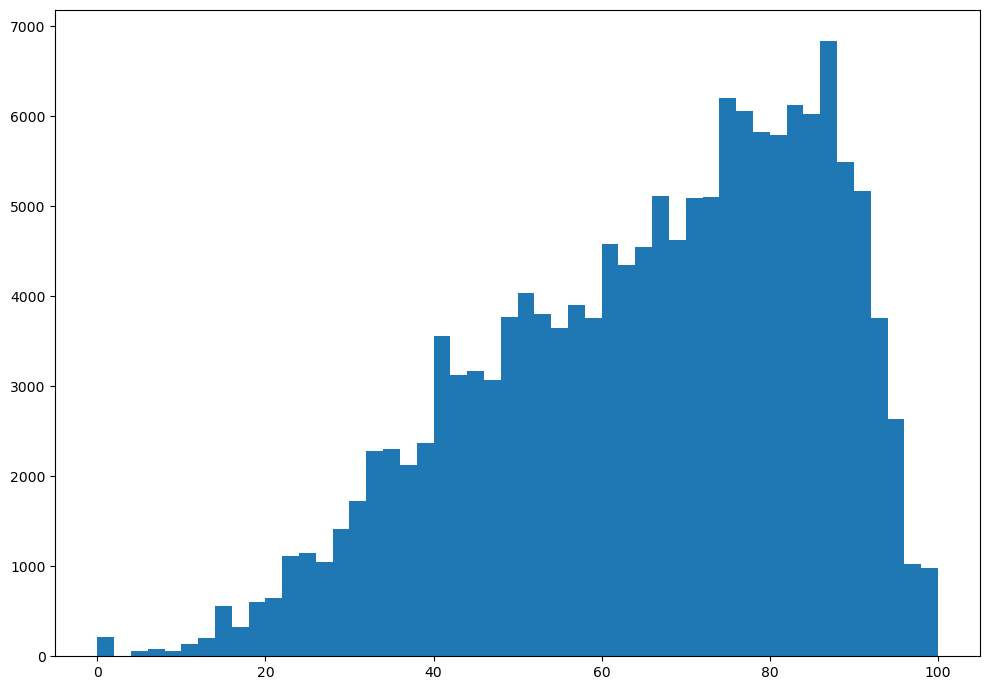

In [14]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(merged_data['audienceScore'], bins = 50)
# Show plot
plt.show()

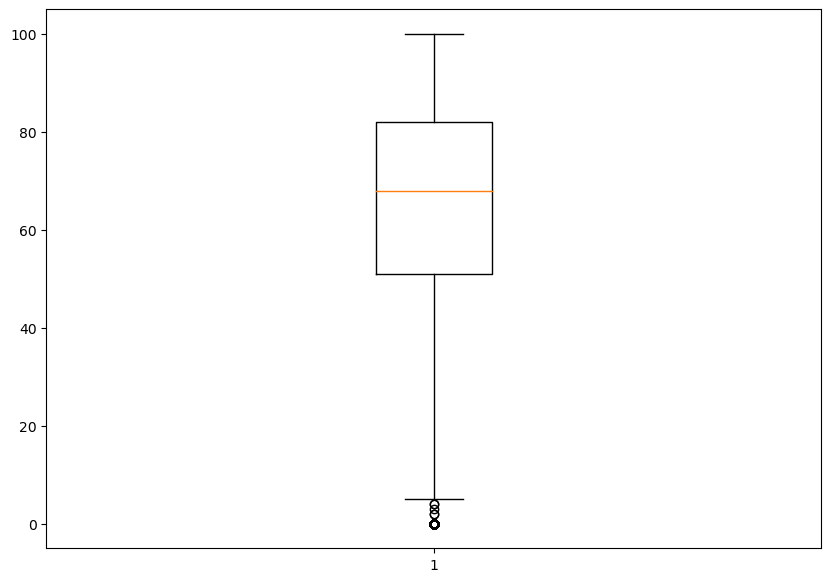

In [15]:
data = merged_data['audienceScore'].dropna()
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [16]:
# Q1 = merged_data['audienceScore'].quantile(0.25)
# Q3 = merged_data['audienceScore'].quantile(0.75)
# IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR
# upper_array = np.where(merged_data['audienceScore']>=upper)[0]
# lower_array = np.where(merged_data['audienceScore']<=lower)[0]
 
# # Removing the outliers
# merged_data.drop(index=upper_array, inplace=True)
# merged_data.drop(index=lower_array, inplace=True)

In [17]:
# import matplotlib.pyplot as plt
# data = merged_data['audienceScore'].dropna()
# fig = plt.figure(figsize =(10, 7))
 
# # Creating plot
# plt.boxplot(data)
 
# # show plot
# plt.show()

In [18]:
# Drop null values

train_df = merged_data.dropna(axis=0, subset=['reviewText'])
train_df.shape

(156311, 18)

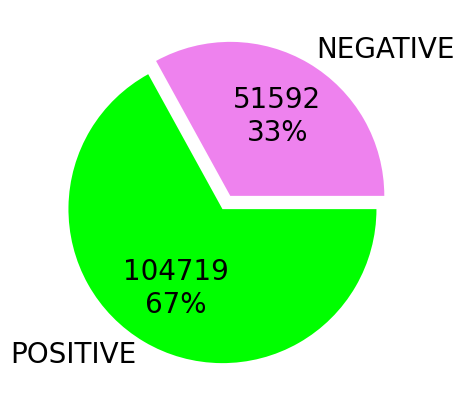

In [19]:
# Pie Chart

def label_function(val):
    return f'{val / 100 * len(train_df):.0f}\n{val:.0f}%'
import matplotlib.pyplot as plt
explode = (0.05,0.05)
fig,ax2 = plt.subplots(ncols=1, figsize=(10, 5))
train_df.groupby('sentiment').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime'], ax=ax2,explode=explode)
plt.show()

<Axes: xlabel='sentiment'>

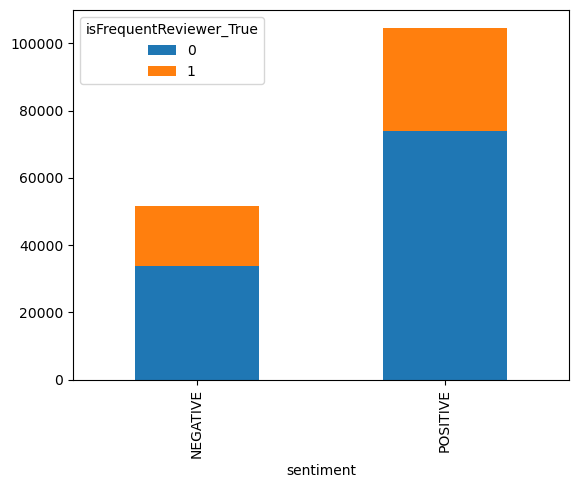

In [20]:
# Bar Chart

barch = pd.get_dummies(train_df,columns=['isFrequentReviewer'])
barch.groupby(['sentiment', 'isFrequentReviewer_True']).size().unstack().plot(kind='bar', stacked=True)

In [21]:
# Correlation between categorical variables and numeric variables

df=train_df.drop(['movieid','reviewerName','reviewText'],axis=1)
df = df.replace('POSITIVE',1)
df = df.replace('NEGATIVE',0)
df.corr(numeric_only = True)

,isFrequentReviewer,sentiment,audienceScore,runtimeMinutes
isFrequentReviewer,1.000000,-0.052721,-0.027958,-0.033607
sentiment,-0.052721,1.000000,0.310568,0.045663
audienceScore,-0.027958,0.310568,1.000000,0.260965
runtimeMinutes,-0.033607,0.045663,0.260965,1.000000


isFrequentReviewer and sentiment are weakly negative correlated

audienceScore and runtimeMinutes are weakly positive correlated

audienceScore and sentiment are weakly positive correlated

In [22]:
x=train_df[['isFrequentReviewer','reviewText','audienceScore']]
y=train_df['sentiment'].copy()

In [23]:
x.head()

,isFrequentReviewer,reviewText,audienceScore
0,False,Henry Selick’s first movie since 2009’s Corali...,65.0
1,False,With a cast that reads like the Vogue Oscar pa...,NaN
2,True,Creed II does not give us anything but another...,80.0
3,False,"I know what you're thinking, but this is no Li...",NaN
4,False,Director Fernando Meirelles tells the story wi...,97.0


In [24]:
y.head()

0    POSITIVE
1    NEGATIVE
2    POSITIVE
3    POSITIVE
4    POSITIVE
Name: sentiment, dtype: object

In [25]:
# Encoding categorical features and feature engineering

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

processor = ColumnTransformer([
    ('onehot', OneHotEncoder(dtype=int), [0]),
    ('tfidf', TfidfVectorizer(), 1),
    ('impute',SimpleImputer(),[2])
])

processor = processor.fit(x)
x_piped = processor.transform(x)

In [26]:
x_piped.shape

(156311, 65223)

In [27]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE()
# X_sm, y_sm = oversample.fit_resample(x_piped, y)

In [28]:
# print(X_sm.shape[0] - x_piped.shape[0], 'New random points generated with SMOTE')

# Baseline Model

In [29]:
# Build a logreg model using pipelines

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(random_state=42)
clf = Pipeline([('preprocessor', processor),
                ('lor',lor)])
model = clf.fit(x,y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print("Accuracy:",model.score(x, y))

Accuracy: 0.8074415748091945


Accuracy: 0.8074415748091945

# Hyper Parameter Tuning

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
parameters = {
    'lor__penalty' : ['l1','l2'], 
    'lor__C'       : np.logspace(-3,3,7),
    'lor__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'lor__max_iter': [50,1000,2000,5000]
}

rcv = RandomizedSearchCV(clf,
                   param_distributions = parameters,
                   scoring='accuracy',
                   cv=5,n_iter=5)        
# rcv.fit(x,y)
# rcv

In [33]:
# rcv.fit(x,y)

In [34]:
# print("Tuned Hyperparameters :", rcv.best_params_)
# print("Accuracy :",rcv.best_score_)

# Tuned Hyperparameters : {'lor__solver': 'newton-cg', 'lor__penalty': 'l2', 'lor__max_iter': 50, 'lor__C': 1.0}
# Accuracy : 0.8132397071160741

Tuned Hyperparameters : {'lor__solver': 'newton-cg', 'lor__penalty': 'l2', 'lor__max_iter': 50, 'lor__C': 1.0}

Accuracy : 0.8132397071160741

In [35]:
# After hyperparameter tuning

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(solver='newton-cg',penalty = 'l2',max_iter=50,C=1.0,random_state=10)
clf = Pipeline([('preprocessor', processor),
                ('lor',lor)])
model = clf.fit(x_train,y_train)

In [36]:
print("Accuracy:",model.score(x_train, y_train))

Accuracy: 0.852504638218924


In [37]:
print("Accuracy:",model.score(x_test, y_test))

Accuracy: 0.8193071682180213


In [38]:
model = clf.fit(x,y)

In [39]:
# # After hyperparameter tuning

# from sklearn.linear_model import LogisticRegression
# lor = LogisticRegression(solver='newton-cg',penalty = 'l2',max_iter=1000,C=1.0)
# clf = Pipeline([('preprocessor', processor),
#                 ('lor',lor)])
# model = clf.fit(x,y)

In [40]:
print("Accuracy:",model.score(x, y))

Accuracy: 0.8522176942121795


Accuracy: 0.8522176942121795

In [41]:
from sklearn.metrics import classification_report
y_pred = model.predict(x)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.83      0.69      0.76     51592
    POSITIVE       0.86      0.93      0.89    104719

    accuracy                           0.85    156311
   macro avg       0.85      0.81      0.83    156311
weighted avg       0.85      0.85      0.85    156311



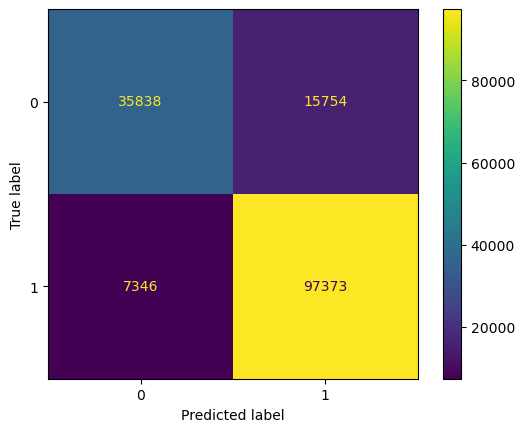

In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.922


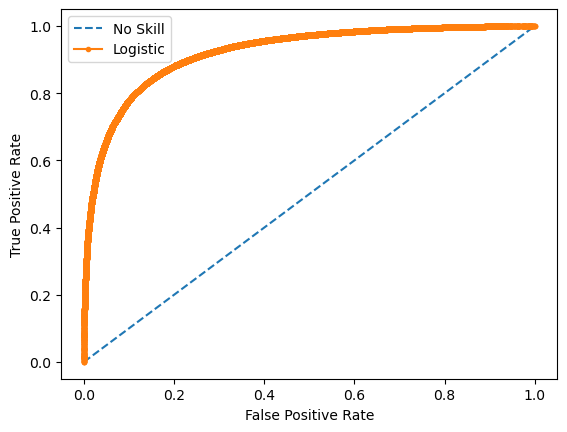

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_encoded))]
lr_probs = model.predict_proba(x)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_encoded, ns_probs)
lr_auc = roc_auc_score(y_encoded, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_encoded, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_encoded, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SGD Classifier

In [45]:
# from sklearn.linear_model import SGDClassifier
# sgd = SGDClassifier(max_iter=1000, tol=1e-3)
# clf = Pipeline([('preprocessor', processor),
#                 ('sgd',sgd)])

In [46]:
# from sklearn.model_selection import RandomizedSearchCV
# parameters = {
#     'sgd__loss' : ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
#     'sgd__penalty' : ['l1','l2'],
#     'sgd__alpha' : [0.0001, 0.001, 0.01, 0.1]
# }

# rcv = RandomizedSearchCV(clf,
#                    param_distributions = parameters,
#                    scoring='accuracy',
#                    cv=5,n_iter=5)        
# # rcv.fit(x,y)
# # rcv

In [47]:
# rcv.fit(x_train,y_train)

In [48]:
# print("Tuned Hyperparameters :", rcv.best_params_)
# print("Accuracy :",rcv.best_score_)

# Tuned Hyperparameters : {'sgd__penalty': 'l2', 'sgd__loss': 'modified_huber', 'sgd__alpha': 0.0001}
# Accuracy : 0.7399002221311639

In [49]:
# from sklearn.linear_model import SGDClassifier
# sgd = SGDClassifier(penalty= 'l2',loss='modified_huber',alpha= 0.0001,random_state=10)
# clf = Pipeline([('preprocessor', processor),
#                 ('sgd',sgd)])

In [50]:
# model = clf.fit(x_train,y_train)

In [51]:
# print("Accuracy:",model.score(x_train, y_train))

In [52]:
# print("Accuracy:",model.score(x_test, y_test))

In [53]:
# losses = ["hinge", "log_loss", "modified_huber", "perceptron", "squared_hinge"]
# scores = []
# for loss in losses:
#     sgd = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
#     clf = Pipeline([('preprocessor', processor),
#                 ('sgd',sgd)])
#     clf.fit(x_train,y_train)
#     scores.append(clf.score(x_test, y_test))
# plt.title("Effect of loss")
# plt.xlabel("loss")
# plt.ylabel("score")
# x_1 = np.arange(len(losses))
# plt.xticks(x_1, losses)
# plt.plot(x_1, scores)

# KNN Classifier

In [54]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')

In [55]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# X_train, X_test, y_train, y_test = train_test_split(X_model,y,test_size=0.2, random_state=42)

# neigh.fit(X_train, y_train)

In [56]:
# y_hat = neigh.predict(X_train)
# y_knn = neigh.predict(X_test)

In [57]:
# print('Training set accuracy: ', accuracy_score(y_train, y_hat))
# print('Test set accuracy: ',accuracy_score(y_test, y_knn))

# Output:
# Training set accuracy:  0.8554395112276886
# Test set accuracy:  0.7241467549499409

Output: 

Training set accuracy:  0.8554395112276886

Test set accuracy:  0.7241467549499409

# SVM Classifier

In [58]:
# #Import svm model
# from sklearn import svm

# #Create a svm Classifier
# svc = svm.SVC(kernel='linear') # Linear Kernel
# clf = Pipeline([('preprocessor', processor),
#                 ('svc',svc)])
# #Train the model using the training sets
# model = clf.fit(x_train, y_train)

In [59]:
# print("Accuracy:",clf.score(X_model,y))

# Output:
# Accuracy: 0.8691902681193262

Output: 
Accuracy: 0.8691902681193262

# CART

In [60]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# clf = Pipeline([('preprocessor', processor),
#                 ('dt',dt)])
# model = clf.fit(x,y)

In [61]:
# print("Accuracy:",model.score(x, y))

In [62]:
# parameters = {
#     'dt__criterion' : ["gini", "entropy", "log_loss"], 
#     'dt__splitter'  : ["best", "random"],
#     'dt__max_depth' : [25,50],
#     'dt__min_samples_split'  : [2,4]
# }

# rcv = RandomizedSearchCV(model,
#                    param_distributions = parameters,
#                    scoring='accuracy',
#                    cv=5,n_iter=5)        
# rcv.fit(x,y)
# rcv

In [63]:
# print("Tuned Hyperparameters :", rcv.best_params_)
# print("Accuracy :",rcv.best_score_)

# # Tuned Hyperparameters : {'dt__splitter': 'random', 'dt__min_samples_split': 4, 'dt__max_depth': 25, 'dt__criterion': 'entropy'}
# # Accuracy : 0.6951718045500351

In [64]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier(splitter='random',min_samples_split=4,max_depth=25,criterion='gini')
# clf = Pipeline([('preprocessor', processor),
#                 ('dt',dt)])
# model = clf.fit(x,y)

In [65]:
# print("Accuracy:",model.score(x, y))

Micro F1 score on test.csv : 0.70537 

After adding 'ifFrequentReviewer' column,
Micro F1 score on test.csv : 0.6944

# BAGGING

In [66]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier
# bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=25,min_samples_split=4,criterion='gini',random_state=0,class_weight='balanced'),n_estimators=10)
# clf = Pipeline([('preprocessor', processor),
#                 ('bagging',bagging)])
# model = clf.fit(x,y)

In [67]:
# from sklearn.ensemble import VotingClassifier
# eclf = VotingClassifier(estimators=[('lor', lor), ('bag', bagging)],voting='hard')
# clf = Pipeline([('preprocessor', processor),
#                 ('voting',eclf)])
# model = clf.fit(x,y)

In [68]:
# print("Accuracy:",model.score(x,y))

In [69]:
# print("Accuracy:",model.score(x,y))

In [70]:
# from sklearn.metrics import classification_report
# y_pred = model.predict(x)
# print(classification_report(y, y_pred))

In [71]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cm = confusion_matrix(y, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# import matplotlib.pyplot as plt
# plt.show()

In [72]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

In [73]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from matplotlib import pyplot
# ns_probs = [0 for _ in range(len(y_encoded))]
# lr_probs = model.predict_proba(x)
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_encoded, ns_probs)
# lr_auc = roc_auc_score(y_encoded, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_encoded, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_encoded, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()

# BOOSTING

In [74]:
# from sklearn.ensemble import GradientBoostingClassifier as gbc
# model = gbc()
# model.fit(X_model,y)

Micro F1 score on test.csv : 0.69858

# Multilayer Perceptron

In [75]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(6,5),
#                    random_state=5,
#                    verbose=True,
#                    learning_rate_init=0.01,
#                    max_iter=25)
# clf = Pipeline([('preprocessor', processor),
#                 ('mlp',mlp)])

In [76]:
# model = clf.fit(x_train,y_train)

In [77]:
# print("Accuracy:",model.score(x_train, y_train))

In [78]:
# print("Accuracy:",model.score(x_test, y_test))

# Voting Classifier (MLPClassifier and Logreg)

In [79]:
# from sklearn.ensemble import VotingClassifier
# eclf = VotingClassifier(estimators=[('lor', lor), ('mlp', mlp)],voting='soft')
# clf = Pipeline([('preprocessor', processor),
#                 ('voting',eclf)])
# model = clf.fit(x,y)

In [80]:
# print("Accuracy:",model.score(x, y))

In [81]:
# from sklearn.metrics import classification_report
# y_pred = model.predict(x)
# print(classification_report(y, y_pred))

In [82]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cm = confusion_matrix(y, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# import matplotlib.pyplot as plt
# plt.show()

Micro F1 score on test.csv : 0.75744

# RESULTS

Micro F1 score on test.csv : 

Logistic Regression : 0.81592

CART / DECISION TREE : 0.69440

Multilayer Perceptron : 0.75744

In [83]:
test = pd.read_csv("../input/sentiment-prediction-on-movie-reviews/test.csv")
test.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [84]:
# test_df=test.drop(['movieid','reviewerName'], axis=1)
# test_df['reviewText']=test_df['reviewText'].fillna('')

# # processor=full_pipeline.transform(test_df)
# # #test_predictions = lr.predict(test_df)
# # processor.toarray()
# test_df
# test_df.rename(columns={'isTopCritic': 'isFrequentReviewer'}, inplace=True)

In [85]:
movies_dataset = movies_dataset.drop_duplicates(subset="movieid")
merged_data_test = pd.merge(test, movies_dataset, how="left", on="movieid")
merged_data_test.head()
test_df=merged_data_test.drop(['movieid','reviewerName'], axis=1)
test_df['reviewText']=test_df['reviewText'].fillna('')
test_df.rename(columns={'isTopCritic': 'isFrequentReviewer'}, inplace=True)
test_df=test_df[['isFrequentReviewer','reviewText','audienceScore']]
test_df

,isFrequentReviewer,reviewText,audienceScore
0,False,Green slowly cranks up the dread with style an...,57.0
1,False,Philip Noyce's direction is elegant and unforc...,86.0
2,False,It wouldn't do to say what path Maria ultimate...,62.0
3,False,Pig is not exactly the arthouse John Wick that...,84.0
4,False,An imaginative no-budget musical of sorts abou...,NaN
...,...,...,...
55310,False,Ron Howard delivers an unconventional romantic...,29.0
55311,False,As an oddball art film that openly invites you...,71.0
55312,False,Nicholson wears his devilish grin from his fir...,60.0
55313,True,It's hard not be entertained by two dozen of C...,65.0


In [86]:
test_predictions = model.predict(test_df)
test_predictions

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'NEGATIVE'], dtype=object)

In [87]:
submission = pd.DataFrame(columns=['id','sentiment'])
submission['id'] = [i for i in range(len(test_predictions))]
submission['sentiment']=test_predictions

In [88]:
submission.shape

(55315, 2)

In [89]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         55315 non-null  int64 
 1   sentiment  55315 non-null  object
dtypes: int64(1), object(1)
memory usage: 864.4+ KB


In [90]:
submission.to_csv('submission.csv',index=False)